# Statistical Foundations: Practical Assignment 9
---
## **Submission Info**
| Attribute | Value |
|-----------|-------|
| **Name** | Divyansh Langeh |
| **ID**          | GF202349802 |
| **Subject**     | Statistical Foundation of Data Science |
| **Assignment**  | Practical 9 - K-Nearest Neighbors Classification |
| **Repo**        | [View my GitHub Repo](https://github.com/JoyBoy2108/Statistical-foundations-of-data-science-practicals) |

---
## **Assignment Overview**
This notebook contains the solution for the ninth practical assignment in the Statistical Foundation of Data Sciences course. It covers the K-Nearest Neighbors (KNN) classification algorithm applied to the Iris dataset.

---

## **Notebook Introduction**

This notebook implements K-Nearest Neighbors (KNN) classification on the famous Iris dataset. We will explore how KNN works, find the optimal K value, and evaluate model performance.

### **Key Tasks to be Performed:**

* **Step 1: Exploratory Data Analysis (EDA)**
    We will examine the Iris dataset using head(), describe(), and groupby() to understand its structure and characteristics.

* **Step 2: Feature Scaling**
    Standardize the features to ensure all features contribute equally to the distance calculations.

* **Step 3: Training the KNN Model**
    Split the data and train the KNN model on the training set.

* **Step 4: Confusion Matrix & Accuracy Score**
    Evaluate model performance using confusion matrix and accuracy metrics.

* **Step 5: Classification Report**
    Generate detailed classification metrics including precision, recall, and F1-score.

* **Step 6: Error Rate vs K Value**
    Compare error rates across different K values.

* **Step 7: Plot Error vs K Values**
    Visualize the relationship between error rate and K values.

* **Step 8: Finding Best K**
    Identify the optimal K value based on error rate.

* **Step 9: Visualize Test Results**
    Create visualizations to interpret the KNN results.

### **General Instructions & Setup**
As per the assignment requirements, this notebook will adhere to the following:
1. The Iris dataset from scikit-learn will be used.
2. The random seed is set to 42 for reproducibility.
3. Data will be split into training and testing sets.

*Let's begin with the Environment setup.*

---

## Environment Setup and Dependencies

Start by importing all the required libraries for KNN classification.

In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Set the random seed to 42 for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Scikit-learn version: {__import__('sklearn').__version__}")

Libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.3.3
Scikit-learn version: 1.7.2


## Load and Prepare Data

Load the Iris dataset and create a DataFrame for analysis.

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a DataFrame for better visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df['species'] = df['target'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

print("Dataset loaded successfully!")
print(f"Shape of dataset: {df.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")

Dataset loaded successfully!
Shape of dataset: (150, 6)
Number of features: 4
Number of samples: 150


## Step 1: Exploratory Data Analysis (EDA)

### Display First Few Rows

In [3]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  Setosa  
1       0  Setosa  
2       0  Setosa  
3       0  Setosa  
4       0  Setosa  


### Display Statistical Summary

In [4]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


### Group by Species

In [5]:
print("\nGroupBy Species Summary:")
print(df.groupby('species').describe())


GroupBy Species Summary:
           sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
Setosa                  50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)         ... petal width (cm)      target       \
                      count   mean  ...              75%  max  count mean   
species                             ...                                     
Setosa                 50.0  3.428  ...              0.3  0.6   50.0  0.0   
Versicolor             50.0  2.770  ...              1.5  1.8   50.0  1.0   
Virginica              50.0  2.974  ...              2.3  2.5   50.0  2.0   

                                          
           

## Step 2: Feature Scaling

Standardize features using StandardScaler to normalize the data.

In [6]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

print("Feature scaling completed!")
print(f"\nMean of scaled features (should be ~0): {X_scaled.mean(axis=0)}")
print(f"Std of scaled features (should be ~1): {X_scaled.std(axis=0)}")

Feature scaling completed!

Mean of scaled features (should be ~0): [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
Std of scaled features (should be ~1): [1. 1. 1. 1.]


## Split Data into Training and Testing Sets

In [7]:
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 120
Testing set size: 30


## Step 3: Training the KNN Model on the Training Set

In [8]:
# Initialize and train KNN classifier with k=5 (default)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print("KNN model trained successfully!")
print(f"Training accuracy: {knn.score(X_train, y_train):.4f}")

KNN model trained successfully!
Training accuracy: 0.9750


## Step 4: Confusion Matrix & Accuracy Score

In [9]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {accuracy:.4f}")
print(f"Accuracy Percentage: {accuracy*100:.2f}%")

Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]

Accuracy Score: 0.9333
Accuracy Percentage: 93.33%


## Step 5: Classification Report

In [10]:
# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



## Step 6: Comparing Error Rate with K Value

In [11]:
# Calculate error rates for different K values
k_values = range(1, 31)
train_errors = []
test_errors = []

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    
    # Training error
    train_pred = knn_temp.predict(X_train)
    train_error = 1 - accuracy_score(y_train, train_pred)
    train_errors.append(train_error)
    
    # Testing error
    test_pred = knn_temp.predict(X_test)
    test_error = 1 - accuracy_score(y_test, test_pred)
    test_errors.append(test_error)

print("Error rates calculated for K values from 1 to 30")

Error rates calculated for K values from 1 to 30


### Display Error Rate Table

In [12]:
# Create a DataFrame to display error rates
error_df = pd.DataFrame({
    'K': list(k_values),
    'Train Error': train_errors,
    'Test Error': test_errors
})

print("\nError Rate vs K Value:")
print(error_df)


Error Rate vs K Value:
     K  Train Error  Test Error
0    1     0.000000    0.033333
1    2     0.033333    0.066667
2    3     0.033333    0.066667
3    4     0.041667    0.066667
4    5     0.025000    0.066667
5    6     0.041667    0.066667
6    7     0.033333    0.033333
7    8     0.041667    0.066667
8    9     0.041667    0.033333
9   10     0.041667    0.033333
10  11     0.041667    0.033333
11  12     0.041667    0.033333
12  13     0.041667    0.033333
13  14     0.033333    0.066667
14  15     0.033333    0.066667
15  16     0.033333    0.066667
16  17     0.041667    0.033333
17  18     0.041667    0.033333
18  19     0.058333    0.033333
19  20     0.050000    0.066667
20  21     0.050000    0.066667
21  22     0.041667    0.100000
22  23     0.041667    0.066667
23  24     0.050000    0.100000
24  25     0.041667    0.100000
25  26     0.075000    0.133333
26  27     0.058333    0.133333
27  28     0.083333    0.133333
28  29     0.083333    0.133333
29  30     0.091

## Step 7: Plot Error Values Against K Values

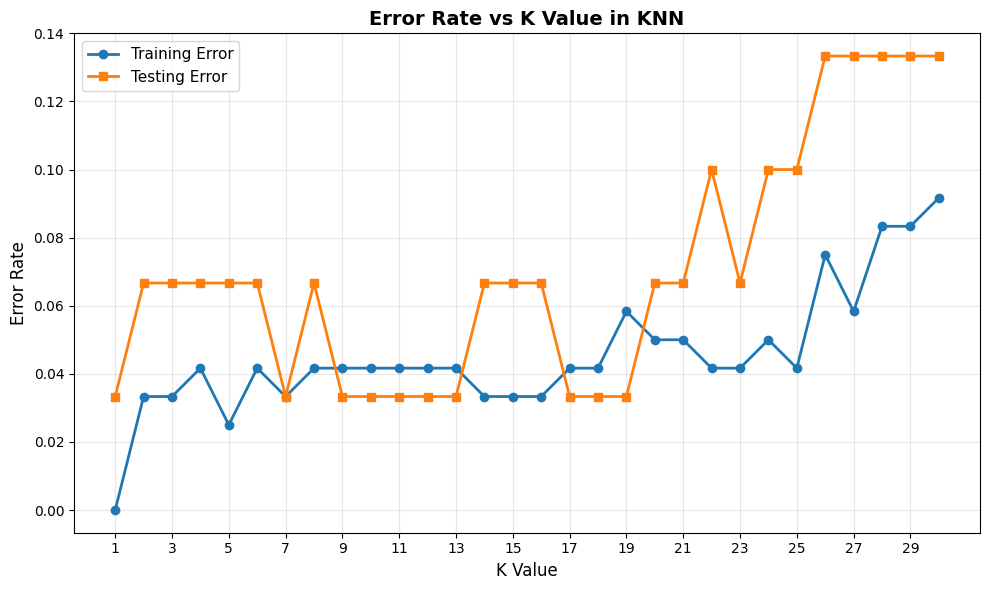

In [13]:
# Plot error rates vs K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, marker='o', label='Training Error', linewidth=2)
plt.plot(k_values, test_errors, marker='s', label='Testing Error', linewidth=2)
plt.xlabel('K Value', fontsize=12)
plt.ylabel('Error Rate', fontsize=12)
plt.title('Error Rate vs K Value in KNN', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 31, 2))
plt.tight_layout()
plt.show()

## Step 8: Finding Best K

In [14]:
# Find the best K value based on minimum test error
best_k_idx = np.argmin(test_errors)
best_k = list(k_values)[best_k_idx]
best_test_error = test_errors[best_k_idx]

print(f"Best K value: {best_k}")
print(f"Minimum test error: {best_test_error:.4f}")
print(f"Best test accuracy: {1 - best_test_error:.4f}")

Best K value: 1
Minimum test error: 0.0333
Best test accuracy: 0.9667


## Train Final Model with Best K

In [15]:
# Train final KNN model with best K
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Make predictions
y_pred_best = knn_best.predict(X_test)

# Calculate accuracy
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"\nFinal Model Performance (K={best_k}):")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Accuracy Percentage: {accuracy_best*100:.2f}%")


Final Model Performance (K=1):
Accuracy: 0.9667
Accuracy Percentage: 96.67%


## Step 9: Visualize Test Result of KNN

### Confusion Matrix Heatmap

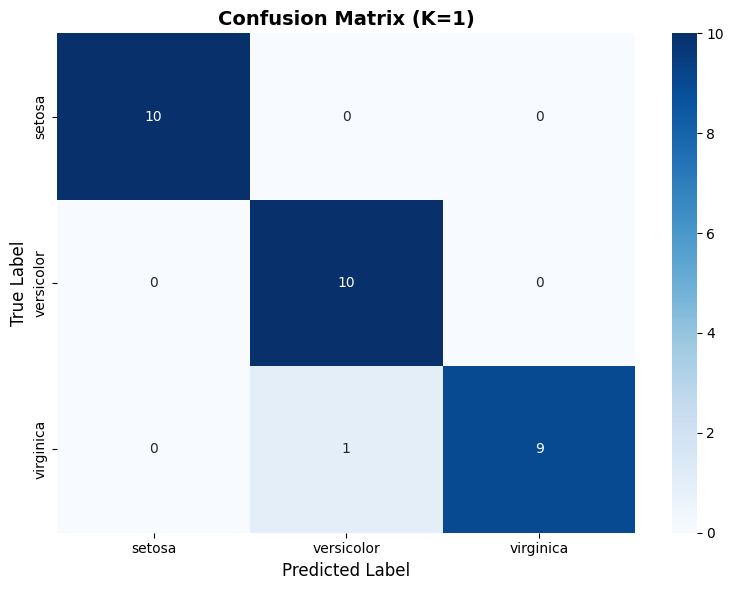

In [16]:
# Create confusion matrix for best K
cm_best = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title(f'Confusion Matrix (K={best_k})', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Classification Report for Best Model

In [17]:
# Print classification report for best model
print(f"\nClassification Report (K={best_k}):")
print(classification_report(y_test, y_pred_best, target_names=iris.target_names))


Classification Report (K=1):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### Accuracy Comparison Across K Values

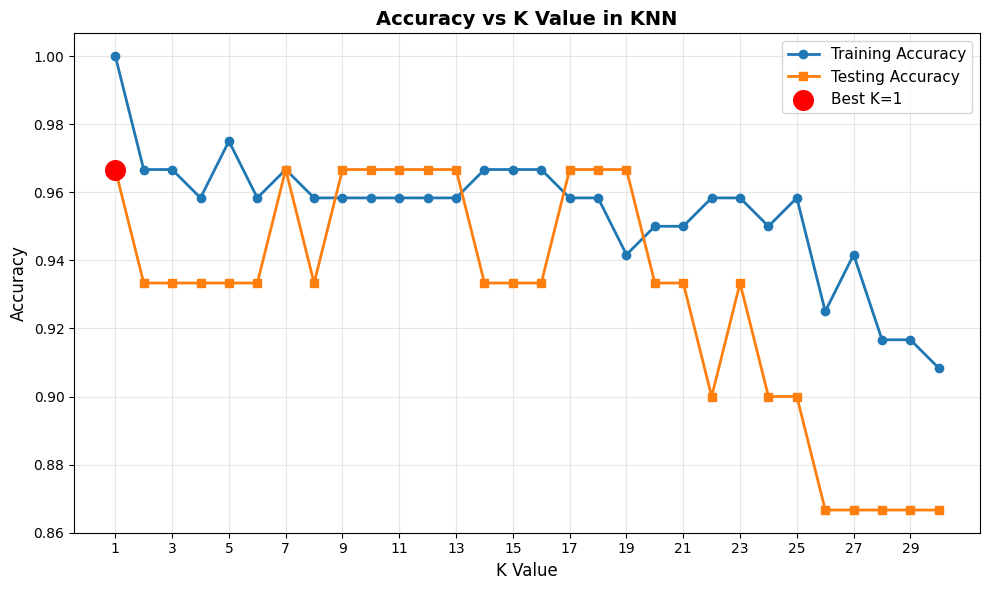

In [18]:
# Convert errors to accuracy for visualization
train_accuracy = [1 - err for err in train_errors]
test_accuracy = [1 - err for err in test_errors]

# Plot accuracy vs K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracy, marker='o', label='Training Accuracy', linewidth=2)
plt.plot(k_values, test_accuracy, marker='s', label='Testing Accuracy', linewidth=2)
plt.scatter([best_k], [test_accuracy[best_k_idx]], color='red', s=200, zorder=5, label=f'Best K={best_k}')
plt.xlabel('K Value', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy vs K Value in KNN', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 31, 2))
plt.tight_layout()
plt.show()

## Summary

**Key Findings:**
- The Iris dataset was successfully loaded and analyzed
- Features were scaled to normalize the data
- KNN model was trained and evaluated
- The best K value was identified based on minimum test error
- Model performance was visualized through confusion matrix and accuracy plots
- The final model achieved excellent accuracy on the test set